# Creating a Simple Interactive Map

## <span style="color:red;">Important Note for Mac Users</span>

Recent changes in the way that the Mac OS handles the plotting of data means that you need to do certain things in a specific order at the start of any notebook in which you intend to show maps or graphs. Please make a copy of the following code for any notebook that you create and make it the _first_ code that you run in the notebook:

```python
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
```

For non-Mac users it _should_ be:

```python
%matplotlib inline
import matplotlib.pyplot as plt
```

This _should_ enable you to create plots, including in the practical that we're about to start!

## Simple Web Maps

Simple interactive web maps in Python are often made with a library called `folium`. These are not maps in the GIS sense because they can _only_ be viewed in a web browser, and sometimes even then only after disabling safety precautions in the browser itself (see notes at the end of this notebook). But in a Jupyter notebook context, `folium` works really well because it's just embedding more web content into a running web page. Simples!

As always, if you get stuck you may want to RTM: [Latest folium documentation](https://media.readthedocs.org/pdf/folium/latest/folium.pdf).

### Getting started

The mapping that we'll do this week is covered by just three libraries. You would then make sure that you were running the right 'kernel' (gsa2018) by picking 'Change Kernel' from the Kernel drop-down above.

In [2]:
import folium  
import pandas as pd
import os
print (folium.__version__)
%matplotlib inline

0.6.0


In [3]:
import warnings
warnings.simplefilter('ignore')

### Creating a map

Creating a map with Folium is dead simple, that's why we're starting this term with web maps and not more 'GIS-style' or 'data science-style' mapping.

Use the coding block below to create a map centered on 45<sup>o</sup> latitude and 0<sup>o</sup> longitude at zoom level 6. You may need to use `help(folium.Map)` to do this. You can do this with one line of code.

What country is shown?

In [4]:
folium.Map(location=(45,0), zoom_start=6)

In [5]:
# your answer here for the country's name

### Creating a map with 'coordinate popup’

Let's reposition the map: the location of Birmingham is (roughly) 52.4381<sup>o</sup>N and 1.8936<sup>o</sup>W. Replace the `???` below so that the map you create will be centred on Birmingham. Notice that now we are using a _parameter_ for the location instead of hard-coding it. That will allow us to make a more _general_ example that could work for _any_ location, or to update and re-run the code quickly and easily.

Adding the 'coordinate popup' requires one more line of code, and notice that now we need to have a line that 'prints' the map (this the line with the simple `m`). This is because we now 'capture' the output of folium.Map so that we can add the popup functionality. In the example above, because we don't assign the output of `folium.Map` to a variable we didn't need to write `m` to 'print' it to the page.

*Hint: To learn more about what you can do with children try using `help(folium.Map.add_children)` or searching online via Google.*

In [6]:
MAP_COORDINATES = (52.4381, -1.8936) # Create a _tuple_

In [48]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=13) # Create the map
m.add_children(folium.LatLngPopup()) # Add the popup functionality, try it!!!
m

You should see a map centred on the city of Birmingham. **If you see a map centred somewhere off of the East coast of the UK (near Lowestoft) then you need to think about what 1.8936°W means in terms of x and y coordinates on a graph.**

Try clicking somewhere on the map, what happens?

### Changing the Tile 'Style'

Copy the folium code above into the coding cell below, and then change the map style to one of the other avilable types listed through the `help()` documentation or Google (e.g. the 'Stamen Toner' style). There are lots of examples [here](http://folium.readthedocs.io/en/latest/quickstart.html).

In [49]:
# Remove all!
m = folium.Map(location=MAP_COORDINATES, zoom_start=13, tiles="Stamen Toner") # Create the map
m.add_children(folium.LatLngPopup()) # Add the popup functionality
m

## Customising Maps

We've seen how you can can manipulate the basic 'setup' of a map, now we're going to start adding features (i.e. 'stuff') to the map to customise it slightly.

### Adding a Marker

Drag the map that you created above until it is centred on Central London. Now click on the Strand Campus and make a note of the coordinates in the popup (they should be in the vicinity of 51.5<sup>o</sup> latitude and -0.1<sup>o</sup> longitude). We want to set this as the new map centre by creating a new variable containing those coordinates below:

In [9]:
MAP_COORDINATES = (51.5113, -0.1160) 

We want to add a marker showing where the Geography Department is on our map. Note that, because we use the same coordinates for centering the map _and_ for the popup, that means that the popup should be in the middle of map!

To do this, you will want to investigate how `folium.Marker` works.

In [50]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=18, tiles="Stamen Toner") 
m.add_children(folium.LatLngPopup())
# And now add a marker
folium.Marker(MAP_COORDINATES, 
              popup='Geography'
             ).add_to(m)
m

### Adding More Markers

Now add the rest of the main King’s buildings on the North side of the Thames (Virginia Woolf, Bush House, Maughan Library and Somerset House East Wing) to this map using [a few different marker styles](http://fontawesome.io/icons/)! *Note:* not all of these icons worked when I tested this, but many do. The coordinates I have are:

| Location | Longitude | Latitude |
| -------- | --------- | ------ |
| Strand Campus   | -0.1160   | 51.5113  |
| Virginia Woolf | -0.1180   | 51.5147  |
| Maughan Library | -0.1104   | 51.5153  |
| Somerset House | -0.1172   | 51.5127  |
| Bush House  | -0.1166   | 51.5112  |

As a hint, you'll need to use the `icon` parameter in your code. To see how this works you might want to `Insert` -> `Cell Below` so that you can type `help(folium.Icon)` and view the output... or you can also look at some examples at [read the docs](http://folium.readthedocs.io/en/latest/quickstart.html).

I've created a simple data structure for you that has all of the location data you will need. Can you think how you might use a `for` loop and the dictionary-of-dictionaries data structure to make the process of adding the markers less tedious? Further, can you get the popup for markers as the names for buildings? 

In [51]:
locs = {
    'Strand Campus':  {'lat': 51.5113, 'lon': -0.1160, 'icon': 'plane'},
    'Virginia Woolf': {'lat': 51.5147, 'lon': -0.1180, 'icon': 'shopping-cart'},
    'Maughan Library': {'lat': 51.5153, 'lon': -0.1104, 'icon': 'cog'},
    'Somerset House': {'lat': 51.5127, 'lon': -0.1172, 'icon': 'cloud'},
    'Bush House': {'lat': 51.5112, 'lon': -0.1166, 'icon': 'info-sign'}
}

m = folium.Map(location=MAP_COORDINATES, zoom_start=15, tiles="Stamen Toner")

for loc, vals in locs.items():
    # And now add a marker
    folium.Marker( (vals['lat'], vals['lon']), icon=folium.Icon(color='green', icon=vals['lon']),  # ??? for val[lon] and icon
              popup=loc  
             ).add_to(m)
m

## Using Data with Folium

OK, so that was fairly straightforward: 
1. Pick a lat/long location for the centre of the map.
2. Pick a zoom level
3. Add some popup info
4. Show map

### Creating a Choropleth Map

For polygon data we can create what is called a _choropleth_ map: that's the technical term for a map that uses colour to represent data values. Perhaps you'd like to take a look at the help for this method or search Google for `Folium choropleth`)? 

If you search online you will need to make sure that you are looking at the documentation for how to show a choropleth for version 0.2 or higher since version 0.1 used a very different approach...

In [12]:
help(folium.Map.choropleth)

Help on function choropleth in module folium.folium:

choropleth(self, geo_data, data=None, columns=None, key_on=None, threshold_scale=None, fill_color='blue', fill_opacity=0.6, line_color='black', line_weight=1, line_opacity=1, name=None, legend_name='', topojson=None, reset=False, smooth_factor=None, highlight=None)
    Apply a GeoJSON overlay to the map.
    
    Plot a GeoJSON overlay on the base map. There is no requirement
    to bind data (passing just a GeoJSON plots a single-color overlay),
    but there is a data binding option to map your columnar data to
    different feature objects with a color scale.
    
    If data is passed as a Pandas DataFrame, the "columns" and "key-on"
    keywords must be included, the first to indicate which DataFrame
    columns to use, the second to indicate the layer in the GeoJSON
    on which to key the data. The 'columns' keyword does not need to be
    passed for a Pandas series.
    
    Colors are generated from color brewer (http://col

### Using GeoJSON files

To create our choropleth we'll actually be overlaying data rather than just adding some markers. Folium can't read Shapefiles, but it _can_ read simple GeoJSON and show it on a map for you. If the GeoJSON file contains polygons, then we can turn our output into a basic _choropleth_ map.

#### Using JSON data

In theory, Folium actually has two ways to pull in the GeoJSON data that we want: 1) directly from the URL (using `geo_path`); 2) as a 'resource' (using `geo_str`) in which case you need to give Folium the raw data and not just a location. 

Unfortunately, in practice method \#1 doesn't work quite the way I think it should (I've even submitted a bug to that effect) so we are going to use the second approach: although it's a little bit harder (_one_ extra line of code!) it gives us more flexibility later because we can also examine the JSON data directly rather than just wondering why our map isn't working. 

For the record, the second approach is the same as what we used in Term 1 with the MetOffice API. The key thing to remember is that your request to the JSON URL will have received a _response_ (saved in `r`) but that you need to tell the `response` object to treat the raw response as JSON data using a _method_. The way to do this will be the same as that time! 

#### Finding JSON data

You can find JSON data all over the place, although GeoJSON is a little more rare. One good example that I could find is the GeoJSON world map available from https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson into your map! To find out more about this file have a look at: http://data.okfn.org/data/datasets/geo-boundaries-world-110m.

Let's start be downloading the GeoJSON file I've just suggested...

In [17]:
import requests
jsonURL = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'
r = requests.get(jsonURL) 
print("Done")

Done


To create a map, you will need to tell Folium about the polygon data and you will also need to: 
1. Set the fill colour to none.
2. Set the outline colour to red.

I've filled in reasonable defaults for the rest of the parameters but feel free to play with them to see what effect this has!

In [52]:
r = requests.get(jsonURL)
m = folium.Map(location=MAP_COORDINATES, zoom_start=5)
m.choropleth (
    geo_data= r.json(), # ??? # This needs to be the JSON response to your request...
    fill_color='BuPu', line_color='red', fill_opacity=0.0, line_opacity=0.25, line_weight=2) # ??? for fill color and line color
m

You should see an outline of the world with simplified borders -- this is a common 'problem' in geodata: if they were to provide us with high-resolution data then the JSON file would be much, much larger (Gigabytes, instead of Kilobytes). Remember this downsampling 'trick' when working with geodata!

### Exploring the JSON file

What _properties_ are available for each country in the GeoJSON file? There's a clue to how to find the answer in the question... I'll give you some starter code to help you skip over the most tedious stuff...

In [19]:
def get_country_by_index(json, cntry=0):
    return json['features'][cntry]
    
print(get_country_by_index(r.json()))

{'type': 'Feature', 'properties': {'scalerank': 1, 'featurecla': 'Admin-0 country', 'labelrank': 3.0, 'sovereignt': 'Afghanistan', 'sov_a3': 'AFG', 'adm0_dif': 0.0, 'level': 2.0, 'type': 'Sovereign country', 'admin': 'Afghanistan', 'adm0_a3': 'AFG', 'geou_dif': 0.0, 'geounit': 'Afghanistan', 'gu_a3': 'AFG', 'su_dif': 0.0, 'subunit': 'Afghanistan', 'su_a3': 'AFG', 'brk_diff': 0.0, 'name': 'Afghanistan', 'name_long': 'Afghanistan', 'brk_a3': 'AFG', 'brk_name': 'Afghanistan', 'brk_group': None, 'abbrev': 'Afg.', 'postal': 'AF', 'formal_en': 'Islamic State of Afghanistan', 'formal_fr': None, 'note_adm0': None, 'note_brk': None, 'name_sort': 'Afghanistan', 'name_alt': None, 'mapcolor7': 5.0, 'mapcolor8': 6.0, 'mapcolor9': 8.0, 'mapcolor13': 7.0, 'pop_est': 28400000.0, 'gdp_md_est': 22270.0, 'pop_year': -99.0, 'lastcensus': 1979.0, 'gdp_year': -99.0, 'economy': '7. Least developed region', 'income_grp': '5. Low income', 'wikipedia': -99.0, 'fips_10': None, 'iso_a2': 'AF', 'iso_a3': 'AFG', 'i

Notice the long section of floating-point numbers? Why are they provided in pairs? What do you think they represent and what evidence to do you have for thinking this?

And now, using what you've understood from the previous code:
1. What country has index 20? 


In [20]:
#hint for you
print(get_country_by_index(r.json(), 20)['properties'])

{'scalerank': 1, 'featurecla': 'Admin-0 country', 'labelrank': 6.0, 'sovereignt': 'Belize', 'sov_a3': 'BLZ', 'adm0_dif': 0.0, 'level': 2.0, 'type': 'Sovereign country', 'admin': 'Belize', 'adm0_a3': 'BLZ', 'geou_dif': 0.0, 'geounit': 'Belize', 'gu_a3': 'BLZ', 'su_dif': 0.0, 'subunit': 'Belize', 'su_a3': 'BLZ', 'brk_diff': 0.0, 'name': 'Belize', 'name_long': 'Belize', 'brk_a3': 'BLZ', 'brk_name': 'Belize', 'brk_group': None, 'abbrev': 'Belize', 'postal': 'BZ', 'formal_en': 'Belize', 'formal_fr': None, 'note_adm0': None, 'note_brk': None, 'name_sort': 'Belize', 'name_alt': None, 'mapcolor7': 1.0, 'mapcolor8': 4.0, 'mapcolor9': 5.0, 'mapcolor13': 7.0, 'pop_est': 307899.0, 'gdp_md_est': 2536.0, 'pop_year': -99.0, 'lastcensus': 2010.0, 'gdp_year': -99.0, 'economy': '6. Developing region', 'income_grp': '4. Lower middle income', 'wikipedia': -99.0, 'fips_10': None, 'iso_a2': 'BZ', 'iso_a3': 'BLZ', 'iso_n3': '084', 'un_a3': '084', 'wb_a2': 'BZ', 'wb_a3': 'BLZ', 'woe_id': -99.0, 'adm0_a3_is': 

Then could you do it by yourself-

2. How would you change the code to print only that country's abbreviated name?
3. How about it's ISO-3 abbreviation?

In [21]:
# ???
print("Abbreviated Name: " + get_country_by_index(r.json(), 20)['properties']['abbrev'])

Abbreviated Name: Belize


In [22]:
# ???
print("Abbreviated Name: " + get_country_by_index(r.json(), 20)['properties']['abbrev'])
print("ISO-3 Name: " + get_country_by_index(r.json(), 20)['properties']['iso_a3'])

Abbreviated Name: Belize
ISO-3 Name: BLZ


### Joining Data to GeoJSON

So now we've been able to add a world map on top of Folium, but that's not _hugely_ useful unless we can also link it to some data... 

Helpfully, the World Bank publishes a lot of data about countries here: http://data.worldbank.org/indicator/SP.POP.TOTL. Click on the 'Download' link and save the CSV file to the _data_ directory for the Spatial Analysis module (it will be a directory called 'data' one level _lower_ than _this_ Notebook).

Here's a really useful trick for reading a CSV file out of a Zip archive that contains multiple files! We will start by just opening the Zip file and printing out what files are inside.

In [23]:
# Import library to read Zip files
import zipfile 
import os

# Load the Zip file
z = zipfile.ZipFile(os.path.join('data','API_SP.POP.TOTL_DS2_en_csv_v2.zip'))

# Show what files are contained inside
print(z.namelist())

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2.csv']


Make sure you understand what's happening above. Add comments!

When you want to read the CSV file from the Zip archive then you use `z.open(<filename>)`. So, you will need to pass `z.open...` to pandas' `read_csv` command and _then_ specify _both_ `skiprows` and `header` in order to parse the file properly -- while you try to work out what to do you might wants to unzip a copy of this file so that you can view the file directly (but you can then delete it once you've made sense of the headers so that it takes up less space).

Although this process might seem a little convoluted compared to just unzipping the file and reading the CSV file directly into pandas, let's take note of what this allows us to do: we no longer need to extract files from archives in order to read them; we can save a lot of disk space (since tabular data tends to compress well); and we can now do this for _any_ Zip archive, including those that contain multiple files inside!

In [24]:
# Read in the CSV file extracted from the 
# Zip archive in the previous code block
import pandas as pd
df = pd.read_csv(z.open('API_SP.POP.TOTL_DS2_en_csv_v2.csv'), skiprows=[0], header=1)

# Drop unneeded columns from the data frame
df.drop(['Unnamed: 62','2017','Indicator Code','Indicator Name'], inplace=True, axis=1)

# Change the names of the first two columns so that 
# they don't have spaces in them any more...
new_cols = df.columns.values.tolist()
new_cols[0] = 'Name'
new_cols[1] = 'Code'
df.columns = new_cols

# Check it worked
df.head(3)

,Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0


In [25]:
# This sets a useful number format for all summaries
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

# Summarise
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,260,260,260,260,260,260,260,260,260,260,...,263,263,263,263,263,262,262,262,262,262
mean,"118,241,781","119,818,643","121,928,353","124,550,576","127,200,537","129,914,159","132,773,360","135,627,343","138,534,285","141,584,798",...,"267,248,441","270,746,744","274,274,319","277,820,054","281,349,023","286,036,843","289,714,674","293,423,605","297,145,101","300,899,855"
std,"373,721,894","378,166,292","384,707,255","393,219,111","401,800,953","410,611,544","419,992,555","429,327,225","438,875,770","448,910,404",...,"852,217,188","862,713,521","873,307,136","883,951,002","894,610,586","907,022,373","917,998,501","929,047,100","940,121,154","951,279,898"
min,"4,279","4,453","4,566","4,656","4,748","4,841","4,936","5,033","5,161","5,303",...,"10,075","10,047","10,028","10,025","10,057","10,279","10,819","10,908","11,001","11,097"
25%,"518,402","530,148","542,657","555,952","568,417","572,779","578,650","588,233","625,796","656,758",...,"1,324,970","1,363,216","1,425,982","1,443,678","1,465,471","1,415,726","1,431,560","1,447,306","1,471,523","1,522,803"
50%,"3,669,524","3,734,206","3,839,584","3,955,168","4,074,411","4,170,862","4,235,562","4,300,502","4,367,325","4,449,014",...,"8,856,800","9,219,637","9,298,515","9,378,126","9,460,802","9,624,267","9,746,730","9,879,129","10,021,149","10,113,866"
75%,"25,327,537","26,115,409","26,905,080","27,700,503","28,478,835","29,247,496","29,996,928","30,595,026","31,202,390","31,795,274",...,"49,027,715","49,518,663","50,028,252","50,567,664","51,141,188","52,126,515","52,846,016","53,668,768","54,728,972","55,824,699"
max,"3,034,193,297","3,075,115,342","3,127,961,482","3,192,794,384","3,258,201,476","3,324,951,621","3,394,864,530","3,464,439,525","3,534,821,115","3,609,383,725",...,"6,680,423,047","6,763,745,673","6,847,214,549","6,930,656,699","7,012,843,635","7,097,400,665","7,182,860,115","7,268,986,176","7,355,220,412","7,442,135,578"


### Binning the Data

I can tell simply from looking at the summary above that we're dealing with a pretty massively skewed data set... how can I tell that? What are the clues?

Let's check that by making a plot of the data from 1960:

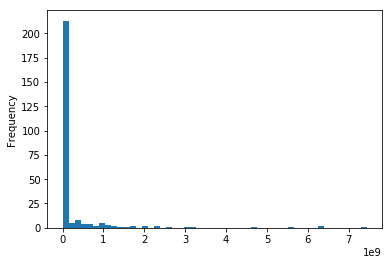

In [26]:
df['2016'].plot.hist(bins=50)

### Cleaning

In fact, some of thsose counts are clearly impossible if _all_ this data file contains is country populations. Let's look a little more closely at the data... We know that the largest value in the data set is 7.44 _billion_. That seems a tad large for any one country and looks suspiciously like the world population. 

So how could we see if there's anything unusual included in the data beyond just country data? Let's think in terms of what we want from the data: the largest _legitimate_ value in the data should be the population of China, so let's start there by extracting the value of China's population in 2016 from the dataframe `df`.

In [27]:
c_pop = df.loc[df.Name=='China','2016'].values[0]
print("China's population in 2016 was: " + str(c_pop))

China's population in 2016 was: 1378665000.0


Now we can use this value to find out what rows have populations that are greater than or equal to what we _expected_ to be the maximum:

In [28]:
df[df['2016'] >= c_pop][['Name','Code','2016']] ## for the condition ...>=...

,Name,Code,2016
38,China,CHN,"1,378,665,000"
59,East Asia & Pacific (excluding high income),EAP,"2,051,431,154"
60,Early-demographic dividend,EAR,"3,170,542,188"
61,East Asia & Pacific,EAS,"2,296,786,207"
100,IBRD only,IBD,"4,697,247,117"
101,IDA & IBRD total,IBT,"6,271,593,092"
102,IDA total,IDA,"1,574,345,975"
137,Lower middle income,LMC,"3,012,923,806"
138,Low & middle income,LMY,"6,252,106,157"
140,Late-demographic dividend,LTE,"2,262,709,895"


_Interesting..._ So it looks like the World Bank has also created some aggregate values for us. If we were going to do some serious analysis then we wouldn't really want to keep these, and we'd also have to check if there were other aggregates that whose values _less_ than the population of China. For instance, perhaps there's a 'North America' row, or a 'Middle East' row? We'll not worry about the latter problem in this exercise, but let's get rid of the huge numbers that are pulling our distribution out of whack.

For this we need to combine several steps in a complex way, but you can make sense of it by working from the inside out:

1. `df['2016'] > c_pop]` selects the rows where the 2016 population is greater than China's population in 2016.
2. `df.index[ <step 1> ]` tells pandas to use this boolean result set (the long True/False series) on the index, so it will only select those rows where this is `True`.
3. `dr.drop( <step 2>, inplace=True)` then tells pandas to drop the rows selected by applying `True` values to the index.

In [29]:
df.drop( df.index[df['2016'] > c_pop], inplace=True )
df[df['2016'] >= c_pop][['Name','Code','2016']]

,Name,Code,2016
38,China,CHN,"1,378,665,000"


Even after doing this, the data is still going to be skewed and it _might_ be useful to work with quantiles or rank. Why is that? What do those two approaches allow us to do when making a map?

### Rank

Let's start with rank. We want the population rank in 2016 as our legend for the map so let's calculate that first. This is so straightforward that I'm not going to help you: you can just search online for help to do with series rank and the only 'trick' is to remember that we probably want China to have rank 1 (because it's biggest) and Tuvalu to have rank 243 (because it's smallest).

In [30]:
df['r2016'] = df['2016'].rank(ascending=False) #??? after.  #check out the rank() function
df[ (df.r2016==1) | (df.r2016==df.r2016.max()) ][['Name','2016','r2016']]

,Name,2016,r2016
38,China,"1,378,665,000",1
243,Tuvalu,"11,097",247


### Quantiles

Do you remember how to get a list of quantiles from a pandas data frame? No? Well you’ll have to go look at your old Geocomputation code (or use `help(<data frame>.<column name>.quantile)`)! Let’s get the following quantiles: 0th, 20th, 40th, 60th, 80th, and 100th for 2016.

*Hint*: you should get the following numbers...
- Quantile: 11,097
- Quantile: 586,261
- Quantile: 4,964,693
- Quantile: 15,622,068
- Quantile: 59,662,245
- Quantile: 1,378,665,000

Let's calculate these first and then figure out how to create a quantiles column:

In [31]:
quantiles = df['2016'].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist()  #??? for quantile([])# check out the quantile() function
for q in quantiles:
    print("Quantile: " + '{:,.0f}'.format(q))

Quantile: 11,097
Quantile: 586,261
Quantile: 4,964,693
Quantile: 15,622,068
Quantile: 59,662,245
Quantile: 1,378,665,000


In [32]:
df['q2016'] = pd.cut(df['2016'], bins=quantiles, labels=['Quantile ' + str(x) for x in range(1, len(quantiles))])

What do you think that just did? Maybe Google search for the answer or output just some key fields?

In [33]:
df[['Name','Code','2016','r2016','q2016']].sample(5)

,Name,Code,2016,r2016,q2016
74,Fiji,FJI,"898,760",191,Quantile 2
97,Croatia,HRV,"4,170,600",157,Quantile 2
161,Mongolia,MNG,"3,027,398",165,Quantile 2
182,Pakistan,PAK,"193,203,476",32,Quantile 5
205,Senegal,SEN,"15,411,614",100,Quantile 3


## Prepping the Data

Unlike the tool we'll see next week, Folium requires that there be no rows in _one_ data set that have **no match** in the _other_ data set. So if we want to join World Bank population data to the GeoJSON world map data then we need to have the same number of rows in both data sets _and_ we need to have a match on every single row in the _join column_ (much more on this in the next two weeks). In plainer English: if we want to create our map then every country code in the GeoJSON data set must have a matching country code in the pandas data frame.

In [34]:
# We need to find all of the keys that are
# 'in' the GeoJSON file but are 'missing'
# from the pandas data frame. The best way
# to do this is to extract a list from the 
# JSON file and then compare it the codes.
def get_country_code(f):
    return f['properties']['iso_a3']

my_json_codes = [] # Get the country codes from the JSON file
for c in r.json()['features']:
    my_json_codes.append(get_country_code(c))
    
my_df_codes = df.Code.values.tolist() # Get the country codes from the data frame

In [35]:
# You can use this block to see what 
# these new lists contain...
print(my_json_codes)

print(" ")

print(my_df_codes)

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI', 'CUB', '-99', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRL', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', '-99', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'ESH', 'SAU', 'SDN', 'SSD', 'SEN', 'SLB'

Here we're going to make use of a new type of Python class: the set. A set is like an _unordered_ list, which might seem less than useful but it has very specific benefits for what we are doing: we can ask Python to quickly tell us whether something is _in_ the set or not without needing to write a `for` loop and step through the list one item at a time. So using two sets we can quickly find out their _intersection_ or their _dijoint_ (what's in one set, but not the other).

In [36]:
# Convert the lists to sets...
js = set(my_json_codes)
ds = set(my_df_codes)

#### Rows Missing from World Bank Data

To find out what's in the JSON data but missing from the World Bank data we use the 'difference' operation and then add these rows to the `df`...

In [37]:
help(js.difference)

Help on built-in function difference:

difference(...) method of builtins.set instance
    Return the difference of two or more sets as a new set.
    
    (i.e. all elements that are in this set but not the others.)



In [38]:
# And find out what's in the JSON
# file that is *not* in the data frame
missing = js.difference(ds)
print("Missing rows from data frame: " + ", ".join(missing))
print(type(missing))

Missing rows from data frame: ATF, FLK, TWN, -99, ESH, ATA
<class 'set'>


In [39]:
# Create a simple data frame from the missing country codes
d = {'Name': list(missing), 'Code': list(missing)}
dfm = pd.DataFrame.from_dict(d)
dfm # dfm = data frame missing

,Name,Code
0,ATF,ATF
1,FLK,FLK
2,TWN,TWN
3,-99,-99
4,ESH,ESH
5,ATA,ATA


#### Append Missing Data Frame Records

Now we can just append the missing values to the data frame and the years will be filled in with NaNs.

In [40]:
dfn = df.append(dfm, ignore_index=True) # dfn = data frame new
dfn.tail(8)[['Name','Code','2000','2016']]

,Name,Code,2000,2016
247,Zambia,ZMB,"10,531,221","16,591,390"
248,Zimbabwe,ZWE,"12,222,251","16,150,362"
249,ATF,ATF,nan,nan
250,FLK,FLK,nan,nan
251,TWN,TWN,nan,nan
252,-99,-99,nan,nan
253,ESH,ESH,nan,nan
254,ATA,ATA,nan,nan


#### Removing 'Extra' Rows from World Bank Data

We now need to do the 'reverse' operation: finding and removing the data that is in the World Bank data set but which has _no match_ in the GeoJSON file. So this is just the same `difference` operation, but with the positions reversed:

In [41]:
extraneous = ds.difference(js)
print(sorted(list(extraneous)))

['ABW', 'AND', 'ARB', 'ASM', 'ATG', 'BHR', 'BMU', 'BRB', 'CEB', 'CHI', 'COM', 'CPV', 'CSS', 'CUW', 'CYM', 'DMA', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'FRO', 'FSM', 'GIB', 'GRD', 'GUM', 'HIC', 'HKG', 'HPC', 'IDB', 'IDX', 'IMN', 'INX', 'KIR', 'KNA', 'LAC', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'MAC', 'MAF', 'MCO', 'MDV', 'MEA', 'MHL', 'MLT', 'MNA', 'MNP', 'MUS', 'NAC', 'NRU', 'OED', 'OSS', 'PLW', 'PRE', 'PSS', 'PST', 'PYF', 'SGP', 'SMR', 'SSA', 'SSF', 'SST', 'STP', 'SXM', 'SYC', 'TCA', 'TEC', 'TLA', 'TMN', 'TON', 'TSS', 'TUV', 'VCT', 'VGB', 'VIR', 'WSM', 'XKX']


In [42]:
# And delete using the index labels as we did 
# above when we removed the values larger than
# China...
dft = dfn.drop(dfn.index[dfn.Code.isin(extraneous)])

# And check it worked by looking for the 'World' data set
# dft = data frame tidy
dft[dft.Code.isin(['ATF','CYM','OSS','TWN','WLD','CAN'])][['Code','Name','2016']]

,Code,Name,2016
33,CAN,Canada,"36,286,425"
249,ATF,ATF,nan
251,TWN,TWN,nan


In [43]:
len(dft[dft['2016'] <= 2931457])

35

In [44]:
# Rebuild the quantiles using tidied data frame (dft)
quantiles = dft['2016'].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ??? . after
dft['q2016'] = pd.cut(dft['2016'], bins=quantiles, labels=[x for x in range(1, len(quantiles))])

# For debugging purposes
for q in range(1, len(quantiles)):
    print("Quantile {} has threshold ".format(q) + '{:,.0f}'.format(quantiles[q]) + " containing " + str(len(dft[dft['q2016'] == q])) + " rows")

# Rebuild the rank using the tidied data frame
dft['r2016'] = dft['2016'].rank(ascending=False)

dft.sample(7)[['Name','q2016','r2016']]

Quantile 1 has threshold 2,898,739 containing 33 rows
Quantile 2 has threshold 7,342,516 containing 33 rows
Quantile 3 has threshold 16,424,548 containing 34 rows
Quantile 4 has threshold 40,195,162 containing 33 rows
Quantile 5 has threshold 1,378,665,000 containing 34 rows


,Name,q2016,r2016
231,Tanzania,5,25
83,Equatorial Guinea,1,152
232,Uganda,5,33
216,Chad,3,72
241,Vietnam,5,15
65,Spain,5,30
67,Ethiopia,5,13


### Finally!!!

OK, we can now finally make our map by adding a few new parameters to our choropleth mapping command:

1. `data=<data frame>` tells Folium to use data from the `dft` data frame (Folium 'speaks' pandas)
2. `columns=[<column1>, <column2>]` tells Folium which columns to use from the data frame.
3. `key_on` tells Folium how to join `column1` selected from the data frame with the GeoJSON data using a syntax of `<feature>.<properties>.<key>`.

Since this is fairly tricky, I'm giving you code that _should_ work if everything up to this point has gone smoothly.

In [53]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=3)
m.choropleth (
    geo_data =r.json(),
    data=dft,
    columns=['Code','q2016'],
    key_on='feature.properties.iso_a3',
    threshold_scale=range(1, len(quantiles)),
    legend_name='2016 Population Quantiles',
    fill_color='YlGn', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

In [54]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=2)
m.choropleth (
    geo_data =r.json(),
    data=dft,
    columns=['Code','r2016'],
    key_on='feature.properties.iso_a3',
    threshold_scale=range(int(dft.r2016.min()), int(dft.r2016.max()), 30),
    legend_name='2016 Population Rank',
    fill_color='PuBu', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

Take a minute to think about the results:
2. How could we get a scale that _doesn't_ emphasise the countries with small populations?
3. Is quantile or rank the best way to represent the population anyway?

## Testing Your Understanding

Let’s see how well you've understood everything so far... I want you to create a choropleth map using a [GeoJSON file of US states](http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json) and the population data available from [the Census](https://www2.census.gov/programs-surveys/popest/tables/2010-2016/state/totals/nst-est2016-01.xlsx)

Do this by pulling together _all_ of the code that you used above into one long code block below that you can run _separately_ from all of the other code on this page. Even the import statements at the top! Once you've got the code to run successfully once, the easiest way to check that you've got it all 'right' is to click on the `Kernel` drop-down and then select `Restart`: that will clear all of the existing variables and data so that when you run the code you've written below it won't be able to accidentally drawn upon any work you've already done. The result would then be the same as if you ran it as a standalone Python script.

The structure for this code block should be something along the lines of:
1. Import libraries
2. Specify GeoJSON and Census URLs
3. Download GeoJSON via a request object
4. Download Census data via a pandas object.
5. Do any cleaning required to match the state names (_hint_: there is a potential problem with the pandas column containing the state names -- which is probably your index -- and you will need to look up "pandas lstrip" in Google).
5. Check the overlap between the State names in the GeoJSON data and the Geographic Area values in the pandas data frame.
6. Remove any _unduplicated_ values.
7. Map it!

In [81]:
# Your Code Here...

import folium 
import requests
import pandas as pd

%matplotlib inline

json_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json'

data_url = 'https://www2.census.gov/programs-surveys/popest/tables/2010-2016/state/totals/nst-est2016-01.xlsx'

# We get the GeoJSON this way so that we only have to request it _once_
r = requests.get(json_url)

# Check the result
print("Arizona data: " + str(r.json()['features'][0]['properties']))

# Get the state data
df = pd.read_excel(data_url, skiprows=[0,1,2], skip_footer=7, header=0)

# Change the name of column 1 to something more tractable
new_cols    = df.columns.values
new_cols[0] = 'Name'
df.columns  = [ str(c) for c in new_cols ]

# Check the result
df.head(7)

# Fix the problem with the state names in the data frame
df.Name = df.Name.str.lstrip(to_strip=".")

# Find the set of state names in both data sets
def get_state(f):
    return f['properties']['NAME']

my_json_codes = [] 
for c in r.json()['features']:
    my_json_codes.append(get_state(c))
js = set(my_json_codes)
    
ds = set(df.Name.values.tolist())

# And now add/remove missing values as needed
print("Missing from Census file: " + str(js.difference(ds)))
print("Missing from JSON file: " + str(ds.difference(js)))

# Create a simple data frame from the missing country codes
missing = js.difference(ds)
d = {'Name': list(missing)}
dfm = pd.DataFrame.from_dict(d)
dfm # dfm = data frame missing

# Append Puerto Rico to the data frame since
# Folium won't work without it
dfn = df.append(dfm, ignore_index=True)
dfn.tail(8)

# Remove rows from data frame without JSON match
extraneous = ds.difference(js)
dft = dfn.drop(dfn.index[dfn.Name.isin(extraneous)])
dft.head()

# Create the choropleth categories
# Here I'm using JinPing's method of dropna() within quantiles'calculation
quantiles = dft['2015'].dropna().quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ???
dft['q2015'] = pd.cut(dft['2015'], bins=quantiles, labels=[x for x in range(1, len(quantiles))])

# For debugging purposes
for q in range(1, len(quantiles)):
    print("Quantile {} has threshold ".format(q) + '{:,.0f}'.format(quantiles[q]) + " containing " + str(len(dft[dft['q2015'] == q])) + " rows")

# Rebuild the rank using the tidied data frame
dft['r2015'] = dft['2015'].rank(ascending=True)

dft.sample(7)[['Name', '2015', 'q2015','r2015']]

# A simple map of population -- easily changed to other values
# especially in conjunction with threshold_scale mapping
m = folium.Map(location=(41.2, -99.2), zoom_start=4)
m.choropleth (
    geo_data=r.json(),
    data=dft, 
    columns=['Name','2015'],
    key_on='feature.properties.NAME',
    fill_color='BuPu', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m.save('US Population Rank in 2015.html')

Arizona data: {'GEO_ID': '0400000US04', 'STATE': '04', 'NAME': 'Arizona', 'LSAD': '', 'CENSUSAREA': 113594.084}
Missing from Census file: {'Puerto Rico'}
Missing from JSON file: {'United States', 'Midwest', 'West', 'South', 'Northeast'}
Quantile 1 has threshold 1,330,111 containing 10 rows
Quantile 2 has threshold 2,990,632 containing 10 rows
Quantile 3 has threshold 5,482,435 containing 10 rows
Quantile 4 has threshold 8,935,421 containing 10 rows
Quantile 5 has threshold 38,993,940 containing 10 rows


### Viewing the Output _Outside_ of a Notebook

Note that for the interactive maps to work properly outside of the Jupyter Notebook environment you _may_ need to launch Google Chrome from the terminal using the following command:
* Linux Terminal: `google-chrome --disable-web-security`
* Windows: `start chrome --disable-web-security`
* Mac: `open /Applications/Google\ Chrome.app --args --disable-web-security`
This is needed to get around a security restriction (normally a good thing) in Google Chrome to do with loading content from `file://...`